<a href="https://colab.research.google.com/github/aryamansharma01/Keywords-for-NESCII_Blog/blob/master/BERTkeywordclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries

import pandas as pd
import numpy as np

In [ ]:
csv = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,2

In [ ]:
data= csv[["title","articleUrls","keywords","text"]]
data.rename(columns={'keywords':'keyword'},inplace=True)
data.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title,articleUrls,keyword,text
0,Testing Android game promotion with 200$ on Ap...,https://medium.com/@mad.noodle.studios/testing...,"Mobile Game Advertising,Marketing,Advertising,...",We recently published our game on the Playstor...
1,"Demigod designers, tiny icons, a language with...",https://uxdesign.cc/the-rise-of-the-demigod-de...,"Hot This Week,Design,Startup,Productivity,Mark...",View this email in your browserRedesign everyt...
2,"How To Write, Market, And Be Mentally Healthy",https://medium.com/ninja-writers/how-to-write-...,"Social Media,Marketing,Mental Health,Writing,Life",Photo by Hannah Wei on UnsplashPart of living ...
3,7 Reasons Behind the Largest Fundraising in Hi...,https://medium.com/swlh/7-reasons-behind-the-l...,"Business,Entrepreneurship,Marketing,Technology...",Image Courtesy Author$5.7 billion for only 9.9...
4,I’m Starting My First Podcast — Here’s How I P...,https://medium.com/the-ascent/im-starting-my-f...,"Podcast,Business,Marketing,Success,Film",Photo by Soundtrap at UnsplashI never planned ...
5,The Insanely Stupid Toy That Made Millions,https://medium.com/illumination/the-insanely-s...,"Business,Entrepreneurship,Startup,Money,Marketing",Photo: Alyssa Atkinson — my personal tamagotch...
6,5 Reasons Why B2B & B2C Experiences Are Merging,https://medium.com/swlh/5-reasons-why-b2b-b2c-...,"B2c,B2B,Marketing,Product Strategy,Direct To C...",Both images © Thomas Reimer | Dreamstime.comTh...
7,Prospecção de clientes com fluxos de cadência:...,https://medium.com/monuv/prospec%C3%A7%C3%A3o-...,"Marketing,Prospec,Seguran,Cameras,Monitoramento",Prospectar novos clientes é um desafio para to...
8,"TALKING POINTS,EVENTS,ACTIVITIES OF YO-XTRM PL...",https://medium.com/@xtrmworld557/talking-point...,"Blockchain,Ethereum,Exchange,Wallet,Marketing",The YO-XTRM team enjoyed a month full and fill...
9,How to Overcome 7 Classic Sales Objection and ...,https://medium.com/swlh/how-to-overcome-7-clas...,"Sales,Sales Calls,Marketing,Sales Tips,How To",How many times does it happen? You go on a sal...


In [ ]:
data.shape

(13182, 4)

In [ ]:
data.dtypes

title          object
articleUrls    object
keyword        object
text           object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13182 entries, 0 to 13181
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        12890 non-null  object
 1   articleUrls  13175 non-null  object
 2   keyword      13120 non-null  object
 3   text         13162 non-null  object
dtypes: object(4)
memory usage: 412.1+ KB


In [ ]:
data['new']=data['keyword'].str.split(',',expand=True)[0]
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,articleUrls,keyword,text,new
0,Testing Android game promotion with 200$ on Ap...,https://medium.com/@mad.noodle.studios/testing...,"Mobile Game Advertising,Marketing,Advertising,...",We recently published our game on the Playstor...,Mobile Game Advertising
1,"Demigod designers, tiny icons, a language with...",https://uxdesign.cc/the-rise-of-the-demigod-de...,"Hot This Week,Design,Startup,Productivity,Mark...",View this email in your browserRedesign everyt...,Hot This Week
2,"How To Write, Market, And Be Mentally Healthy",https://medium.com/ninja-writers/how-to-write-...,"Social Media,Marketing,Mental Health,Writing,Life",Photo by Hannah Wei on UnsplashPart of living ...,Social Media
3,7 Reasons Behind the Largest Fundraising in Hi...,https://medium.com/swlh/7-reasons-behind-the-l...,"Business,Entrepreneurship,Marketing,Technology...",Image Courtesy Author$5.7 billion for only 9.9...,Business
4,I’m Starting My First Podcast — Here’s How I P...,https://medium.com/the-ascent/im-starting-my-f...,"Podcast,Business,Marketing,Success,Film",Photo by Soundtrap at UnsplashI never planned ...,Podcast


In [ ]:
columns = ["title"]
for column in columns:
    print(data[column].unique(),data[column].nunique())

['Testing Android game promotion with 200$ on AppBrain, Applovin and Chartboost'
 'Demigod designers, tiny icons, a language without letters — and more UX this week'
 'How To Write, Market, And Be Mentally Healthy' ...
 'One Simple Change to Boost A Manager’s Productivity'
 'What is timeboxing?'
 '<strong class="bt">How to Improve Your Managerial Skills</strong>'] 10059


In [ ]:
data.replace(["NaN","[]"], np.nan, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
data.isnull().sum()

title          292
articleUrls      7
keyword         62
text            20
dtype: int64

,Total,Percent
title,292,0.022151
keyword,62,0.004703
text,20,0.001517
articleUrls,7,0.000531


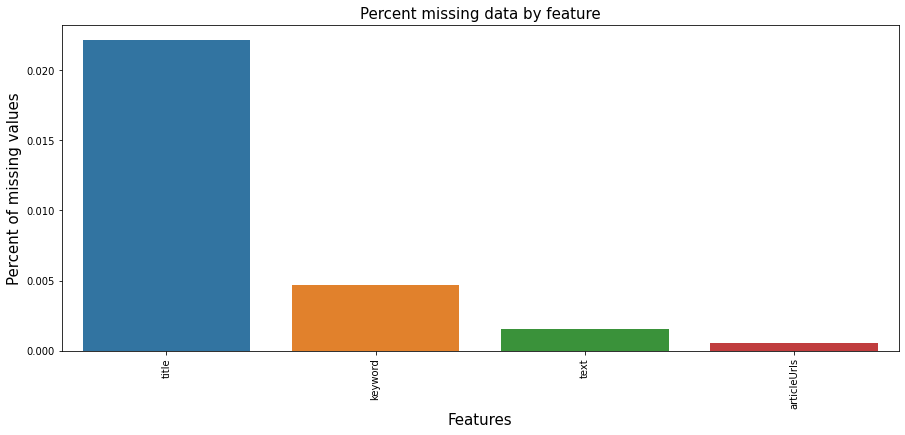

In [ ]:
#Visualize the proportion of missing values

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')

sns.barplot(x=missing_data.index, y=missing_data['Percent'])

plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

missing_data.head()

In [ ]:
#Examine the rows where the target variable is missing to check if the corresponding features are missing or corrupt

data[data['keyword'].isna()]


,title,articleUrls,keyword,text
78,NaN,https://medium.com/@nikolinni/was-about-to-say...,NaN,Was about to say something like this! There's ...
307,NaN,https://medium.com/@andrew_holliday/always-get...,NaN,Always get a second set of eyes on creative wo...
308,NaN,https://medium.com/@rosalindwarren/good-to-kno...,NaN,Good to know. Thanks!Written byRoz WarrenWriti...
409,NaN,https://medium.com/@vikingz2000/great-article-...,NaN,Great article; I’ll be chuckling throughout th...
510,NaN,https://medium.com/@jangelo/this-article-has-s...,NaN,This article has several read-out-loud and lau...
...,...,...,...,...
11385,NaN,https://medium.com/@quasimodo/i-thought-that-l...,NaN,I thought that “Let the cat out of the bag” re...
11516,NaN,https://medium.com/@martinaaberge/oh-i-had-the...,NaN,Oh. I had the Nokia 8110 with custom painted c...
11665,NaN,https://medium.com/@cheopys/well-that-was-cert...,NaN,Well that was certainly the case with whiteboa...
11668,NaN,https://medium.com/@cheopys/hate-these-tests-3...,NaN,Hate these tests. Long ago I had one in C++ an...


In [ ]:
#Articles with no target tags can be used to test the final model, so we extract and store them in a list for later use

data.head()
test_sample = data[data['keyword'].isna()].text
test_sample = test_sample.tolist()

In [ ]:
data.dropna(subset=['keyword','text'], how='any', inplace=True)

data = data.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.isnull().sum()

title          264
articleUrls      0
keyword          0
text             0
dtype: int64

In [ ]:
data.shape

(13108, 4)

In [ ]:
target = data.keyword

In [ ]:
labels = list()

In [ ]:
for item in target:
    temp = item.split(',')
    for x in temp:
        x_ = x.strip()
        if x_ not in labels:
            labels.append(x_) 
    else:
            continue

In [ ]:
num_labels = len(labels)
print(num_labels)

8980


In [ ]:
print(labels)

['Mobile Game Advertising', 'Marketing', 'Advertising', 'Android', 'Android Games', 'Hot This Week', 'Design', 'Startup', 'Productivity', 'Social Media', 'Mental Health', 'Writing', 'Life', 'Business', 'Entrepreneurship', 'Technology', 'Leadership', 'Podcast', 'Success', 'Film', 'Money', 'B2c', 'B2B', 'Product Strategy', 'Direct To Consumer', 'Prospec', 'Seguran', 'Cameras', 'Monitoramento', 'Blockchain', 'Ethereum', 'Exchange', 'Wallet', 'Sales', 'Sales Calls', 'Sales Tips', 'How To', 'Creativity', 'Writing Life', 'Freelancing', 'Tik Tok', 'Security', 'Privacy', 'Data Science', 'Rfm Analysis', 'Clustering', 'SEO', '2 Minute Madness', 'Google', 'Advice', 'Blogging', '', 'Personalization', 'Digital Health', 'Disruption', 'Healthcare', 'Digital Marketing', 'Why A Marketing Agency', 'Digital Marketing Experts', 'Questions About Marketing', 'Storytelling', 'Artificial Intelligence', 'Insurtech', 'Fintech', 'Transportation', 'Pepsi', 'Kendall Jenner', 'Ad Campaign', 'Nodejs', 'Web Developme

In [ ]:
for label in labels:
    data[label]=0

In [ ]:
data.shape

(13108, 8984)

In [ ]:
for index, row in data.iterrows():
    for label in labels:
        if label in row['keyword']:
            data.at[index, label] = 1

In [ ]:
for column in labels:
    print(data[column].value_counts())

Streaming output truncated to the last 5000 lines.
1        1
Name: Antler Network, dtype: int64
0    13107
1        1
Name: Antler United States, dtype: int64
0    13106
1        2
Name: Live Streaming Software, dtype: int64
0    13106
1        2
Name: Lol, dtype: int64
0    13107
1        1
Name: while theoretically countering Nautilus in lane as well. With the nerfs to Nautilus’ shield, dtype: int64
0    13106
1        2
Name: Fau G, dtype: int64
0    13107
1        1
Name: Battle Racers, dtype: int64
0    13107
1        1
Name: Mousesports, dtype: int64
0    13088
1       20
Name: Indian, dtype: int64
0    13107
1        1
Name: Pixel Art, dtype: int64
0    13107
1        1
Name: Stress Management, dtype: int64
0    13107
1        1
Name: Stress Relief, dtype: int64
0    13107
1        1
Name: Stress Management Tips, dtype: int64
0    13107
1        1
Name: Visual Novel, dtype: int64
0    13107
1        1
Name: Guangdong, dtype: int64
0    13104
1        4
Name: Casin, dtype: int64

In [ ]:
#Install bert and fastai

!pip install pytorch_pretrained_bert
!pip install fastai

     |████████████████████████████████| 133kB 6.8MB/s 
     |████████████████████████████████| 133kB 10.8MB/s 
     |████████████████████████████████| 7.3MB 10.5MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
ERROR: botocore 1.20.22 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
#Import libraries

from pathlib import Path
from typing import *

import torch
import torch.optim as optim

from fastai import *
from fastai.vision import *
from fastai.text import *
from fastai.callbacks import *


In [ ]:
#Define constants

max_lr = 3e-5
epochs = 2
batch_size = 4
max_seq_len = 512

target_col = "text"
bert_model_name = "bert-base-uncased"
bert_model_path = "https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt"

In [ ]:
#Download the pre-trained model

from pytorch_pretrained_bert import BertTokenizer

bert_tok = BertTokenizer.from_pretrained(bert_model_path)

100%|██████████| 231508/231508 [00:00<00:00, 917334.36B/s]


In [ ]:
class FastAiBertTokenizer(BaseTokenizer):
    def __init__(self, tokenizer: BertTokenizer, max_seq_len, **kwargs):
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len

    def __call__(self, *args, **kwargs):
        return self

    def tokenizer(self, t:str) -> List[str]:
        
        # We need to add special tokens at the beginning and end of each sentence for BERT to work properly
        return ["[CLS]"] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + ["[SEP]"]

In [ ]:
fastai_tokenizer = Tokenizer(tok_func=FastAiBertTokenizer(bert_tok, 
                                                          max_seq_len=max_seq_len), 
                                                          pre_rules=[], 
                                                          post_rules=[])

In [ ]:
#Construct a fastai Vocab object to use for preprocessing

fastai_bert_vocab = Vocab(list(bert_tok.vocab.keys()))


In [ ]:
#Split the data into train and val

from sklearn.model_selection import train_test_split

train, val = train_test_split(data)

In [ ]:
databunch = TextDataBunch.from_df(".", train, val,
                  tokenizer=fastai_tokenizer,
                  vocab=fastai_bert_vocab,
                  include_bos=False,
                  include_eos=False,
                  text_cols=target_col,
                  label_cols=labels,
                  bs=batch_size,
                  collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
             )

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
from pytorch_pretrained_bert.modeling import BertConfig, BertForSequenceClassification

bert_model = BertForSequenceClassification.from_pretrained(bert_model_name, num_labels = num_labels)

100%|██████████| 407873900/407873900 [00:10<00:00, 39464039.50B/s]


In [ ]:
print(bert_model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
   

In [ ]:
loss_func = nn.BCEWithLogitsLoss()

In [ ]:
learner = Learner(
    databunch, 
    bert_model,
    loss_func=loss_func,
    model_dir='.', 
    metrics=fbeta, 
  )

In [ ]:
learner.fit_one_cycle(1, max_lr=max_lr)

epoch,train_loss,valid_loss,fbeta,time
0,0.006516,0.006637,0.308694,11:43:51


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
learner.recorder.plot()

NameError: ignored

In [ ]:
def predict_tags(inp_txt):
    print(inp_txt,"\nTags:",learner.predict(inp_txt)[0],"\n")

In [ ]:
for item in test_sample:
      predict_tags(item)